# LAB 4
- Sai Sambhu Prasad Kalaga
- Zachary Mitchell
- Hrithik Chavva
- Michael Then

# Research Question, Motivation and Related Works

### _Research Question:_ 
Can a transfer learning framework effectively identify which instrument in a polyphonic audio snippet is out of tune?

We propose using the VGGish pre-trained model due to its effectiveness in audio recognition tasks. Our approach involves applying transfer learning to fine-tune this model using audio data composed of short recordings featuring a mix of instrument sounds, with one instrument intentionally out of tune. The model will be trained to identify the out-of-tune instrument as the target label. The dataset will be generated using samples from the NSynth dataset. For the transfer learning model itself we will experiment with sereval models.

### _Related works section_

#### Related works on VGGish

The pre-trained model selected for this project is VGGish, a convolutional neural network (CNN) model developed by Google and adapted from the VGG image recognition model for use with audio data. In the work Musical Instruments Recognition: A Transfer Learning Approach, the VGGish model was employed as a feature extractor that converts audio input features into 128-dimensional embeddings suitable for classification tasks. These embeddings capture audio characteristics that transfer well to various downstream applications (Cano et al., 2020).

VGGish has also been used for multi-instrument detection. For example, Gururani et al. (2018) tackled instrument activity detection in polyphonic music by training deep networks on the OpenMIC dataset composed of multi-label 10-second clips with instrument presence/absence. They made use of VGGish features and experimented with different pooling mechanisms. In a follow-up study, Gururani et al. (2019) introduced an attention mechanism on top of the VGGish embeddings to help the model determine which time frames in the audio were relevant for each instrument. This attention-based model outperformed previous baseline pooling methods and achieved higher instrument-specific F1-scores. The attention model was capable of recognizing moments in the audio that indicated a particular instrument in a mixture, significantly improving detection in polyphonic settings.

Other studies have also used VGGish for polyphonic instrument recognition. Mukhedkar (2020) explored sequence models on weakly labeled data and found that models using VGGish features were able to detect multiple instruments without requiring strong annotations. Regarding transfer learning, Cano et al. (2020) compared various pre-trained audio embeddings—including VGGish and OpenL3—and found that even a simple linear SVM trained on these embeddings could achieve accuracy comparable to models specifically trained for instrument classification.

#### Related Works on Detecting Out-of-Tune Instruments

Abeßer et al. (2015) presented a score-informed method to analyze intonation in jazz recordings. They first used the musical score to perform source separation, extracting the solo instrument from the backing band. From the accompaniment, they estimated a reference tuning frequency and then tracked the fundamental frequency contours of each note played by the soloist. This allowed them to assess how the solo instrument’s intonation deviated from equal temperament (i.e., standard Western tuning) or the ensemble's tuning reference. For instance, the system could identify if a saxophone solo was consistently sharp or flat relative to the rest of the band. While their study was more analytical than classificatory—focusing on characteristics like vibrato and tuning drift—it demonstrated the feasibility of isolating and evaluating instrument pitch in polyphonic contexts.

More recently, Chou et al. (2025) addressed automatic music performance error detection in polyphonic music, including pitch errors. They introduced Polytune, a transformer-based model that simultaneously transcribes musical audio and compares performance notes to expected notes in the generated transcription. In polyphonic scenarios, Polytune was able to identify mistakes made by instruments—for example, when a piano played incorrect notes. It worked across 14 different instrument parts and achieved an average F1 score of 64.1% for error detection, outperforming prior methods by about 40 percentage points. While this study primarily focused on note errors, Polytune’s ability to flag inconsistent or unexpected notes suggests it could potentially be used for tuning error detection as well. This marks an important step toward detecting anomalies in ensemble music performances.

#### Lack of annotated data for tuning-detection tasks.

For our research, we also found several recent studies from the last three years that emphasized a shortage of publicly available data for tuning detection. A project at the University of Rochester in 2023 tackled automatic guitar tuning detection, aiming to classify whether a guitar performance was in tune or not. The authors reported an immediate data challenge: “No suitable dataset for our project existed, so we had to create our own” (Parker & Chew, 2023). Similarly, a 2023 study by Zhang et al. explored machine learning to detect performance errors such as intonation, rhythm, and tempo in violin playing. Lacking large public datasets, they recorded their own data: one collection with 13 solo violin excerpts (each played once correctly and once with intentional intonation mistakes), and an expanded dataset of 28 pieces with multiple recordings each (Zhang et al., 2023). 

Additionally, Tejada et al. (2023) developed a tool for real-time intonation feedback for beginner instrument players. Due to the absence of consolidated datasets, they relied on collecting their own audio samples from students to validate their system. These examples collectively underscore the difficulty of sourcing labeled audio for tuning detection tasks across different instruments and performance levels.

### Research Motivations

These related works show that there is a strong precedent for using a pre-trained model like VGGish in musical instrument detection, particularly in polyphonic audio settings. Based on these studies, we believe that VGGish can extract features useful for detecting individual instruments within complex mixtures.

In the area of detecting instrument tuning issues in polyphonic audio, Abeßer et al. (2015) laid the groundwork by separating a solo instrument and comparing its pitch to that of the ensemble using a score-informed approach. However, their method focused primarily on solo instruments, while our project aims to develop methods for detecting which specific instrument is out of tune within an ensemble, and importantly, to do so without relying on musical scores.

Chou et al. (2025) demonstrated with Polytune that it is possible to detect performance errors—including incorrect notes—in polyphonic music. While their model does not explicitly focus on tuning issues, the overlap between pitch errors and tuning deviations presents a promising direction for further research.

It was also made apparent in the section above that there is a notable lack of publicly available datasets specifically oriented toward tuning detection tasks. Several recent studies have highlighted this limitation, noting that the absence of labeled data for detecting out-of-tune performances required researchers to collect or synthesize their own datasets. In light of these challenges, we have chosen to address this gap by using a modified version of the NSynth dataset to create a custom dataset tailored for polyphonic tuning detection, where mixtures of instruments contain one intentionally detuned source.
Despite these advances, no known work has yet combined transfer learning using VGGish embeddings with synthetic polyphonic datasets like NSynth to directly train a model that can recognize which specific instrument is out of tune in an ensemble—this represents a significant gap in the research landscape.

The NSynth dataset provides a unique opportunity to generate controlled, labeled audio mixtures in which pitch variations can be precisely introduced. Coupled with VGGish’s proven capacity to extract meaningful audio features, this approach could enable the development of a model capable of detecting pitch-related anomalies in polyphonic settings something that has not yet been explicitly addressed in prior studies.

Together, these works highlight a gap at the intersection of polyphonic instrument recognition and tuning anomaly detection, motivating our investigation into whether VGGish-based features, combined with synthetic training data, can support a model that identifies not just the presence of instruments, but also which among them is out of tune.

### Use Case Motivations:

In musical ensembles, having instruments in tune can be a key characteristic to making sure a performance sounds good. In rehearsals it is up to musicians to personally be able to detect whether they have correct intonation with the rest of the ensemble or they use a tuner. This personal responsibility of the individual musician to pay attention to tuning is not completely accurate and musicians can be totally unaware of the issue altogether. This is where a model that can detect the tuning issue would be useful. It could be used to catch these errors and inform the musicians of which specific instrument caused the issue

An effective intonation detection model could also be used for music education purposes such as middle or high school music classes. In these settings, students are still learning how to tune their instruments, which means that many more tuning issues will be present when they are playing in a big ensemble(Group of instruments playing together). Usually the conductor of the ensemble has to manually go through a group instruments and waste time trying to figure out who is out of tune. A model that is able to quickly determine which instrument is causing the intonation problems would make it take less time to fix the tuning problems and help the ensemble continue to rehearse. This type of intonation could also be effective in helping smaller ensembles that are led by the students. 

Another thing to consider is the application of this model in music editing software where music recordings are edited and it is up to the person editing to sort out the issues. This model could automate the process of finding the tuning problems and make the music editing process more efficient.


### References
1. Abeßer, J., Cano, E., Frieler, K., Pfleiderer, M., & Zaddach, W. G. (2015). Score-Informed Analysis of Intonation and Pitch Modulation in Jazz Solos. In ISMIR (pp. 823-829).

2. Grollmisch, S., Cano, E., Kehling, C., & Taenzer, M. (2021, January). Analyzing the potential of pre-trained embeddings for audio classification tasks. In 2020 28th European Signal Processing Conference (EUSIPCO) (pp. 790-794). IEEE. https://ieeexplore.ieee.org/abstract/document/9287743

3. Chou, B. S. H., Jajal, P., Eliopoulos, N. J., Nadolsky, T., Yang, C. Y., Ravi, N., ... & Lu, Y. H. (2025). Detecting Music Performance Errors with Transformers. arXiv preprint arXiv:2501.02030. https://arxiv.org/abs/2501.02030

4. Gururani, S., Summers, C., & Lerch, A. (2018, September). Instrument Activity Detection in Polyphonic Music using Deep Neural Networks. In ISMIR (pp. 569-576). https://ismir2018.ismir.net/doc/pdfs/275_Paper.pdf

5. Gururani, S., Lerch, A., & Tzanetakis, G. (2019).
 An attention mechanism for musical instrument recognition.
 Presented at ML4Audio Workshop @ NeurIPS 2019.
 https://doi.org/10.48550/arXiv.1907.04294

6. Mukhedkar, D. (2020). Polyphonic Music Instrument Detection on Weakly Labelled Data using Sequence Learning Models (Dissertation). Retrieved from https://urn.kb.se/resolve?urn=urn:nbn:se:kth:diva-279060

7. Parker, D., & Chew, M. (2023). Guitar Tuning Detection. University of Rochester.https://hajim.rochester.edu/ece/sites/zduan/teaching/ece477/projects/2023/DeclanParker_McCormackChew_FinalReport.pdf

8. Zhang, H., & Talagala, N. (2023). Artificial intelligence assisted violin performance learning. J. Emerg. Investigators.https://emerginginvestigators.org/articles/22-264

9. Pardue, Laurel & McPherson, Andrew. (2019). Real-Time Aural and Visual Feedback for Improving Violin Intonation. Frontiers in Psychology. 10. 10.3389/fpsyg.2019.00627. 

# Hypothesis

A transfer learning model using pre-trained audio embeddings will achieve moderate accuracy in identifying out-of-tune instruments in polyphonic audio. Its performance will decline in scenarios involving greater instrument overlap, varied volume levels, or complex audio characteristics

# The Dataset

The dataset used for our transfer learning task uses the NSynth dataset as a base and what we have done to this data is take 13 of the 1006 different instrument sounds and formed .wav files that have stack multiple of these instrument audio files and into one file to create to create a simple example of polyphonic audio. For the 13 instruments we chose ,string_bass, bass_guitar, flute, trumpet, trombone, tuba, guitar_acoustic, guitar_electric, viola, violin, saxophone, oboe, and bassoon however the generated data did not include any saxophones. We chose these instruments because they are common and have a variety of pitch ranges.  On top of this one instrument has been pitch shifted in order to simulate one instrument being out of tune in the whole group. This dataset contains 100000 samples and will be used for our transfer learning model. For our dataset, we started with 1000 .wav files with a randomly selected instrument that was pitched up or down 1 or 2 semitones. This initial data set did not have very good results. We then produced spectrograms as well as .wav files to try and get some results. Combining both did start giving us results at a 10% accuracy. From there we decided to regenerate the data while limiting the number of instruments to 13 main instruments and increasing the sample size to 100,000. With this dataset we managed to achieve an accuracy of 20% -30%. Again we decided to regenerate the data this time reducing the semitone distance to sub-semitonal to more accurately represent out of tune instruments and as well as bumping the sample size to 300,00 instruments. From this new data set our CNN reached an overall accuracy of 35%

# Analyses Description

In all the analyses below, we compared the results of 3 baseline models against their transfer learning counterparts and each other. This will help us to determine whether the transfer learning improves the performance of the models overall. 

__1. Overall Model Performance: Accuracy and Confusion Matrix__

To establish a general baseline for our model’s effectiveness, we use accuracy and confusion matrices as primary evaluation tools.
    
Accuracy provides a straightforward metric: the proportion of correctly predicted test samples across all classes. It offers a quick and intuitive snapshot especially useful for comparing  the different model architectures. We also plan to use validation curves to monitor convergence behavior and detect underfitting or overfitting.
    
The confusion matrix  will accompany the accuracy by offering a detailed breakdown of misclassifications across instrument classes. It allows us to identify whether the model confuses specific instruments (e.g., oboe vs. clarinet, cello vs. violin), which is particularly important in polyphonic audio where similar timbres can mislead predictions.

__Why this is relevant:__ 

Together, these metrics offer both a broad and detailed understanding of the model’s performance. Accuracy addresses the high-level question: Is the model performing better than random guessing? It is very crucial for our model to be able to get a decent accuracy score because it means that the model will at least be able to recognize which instrument is out of tune most of the time. Meanwhile, the confusion matrix highlights class-specific ambiguities, helping to identify which instruments are frequently misclassified and may require additional training data or clearer representations. It also reveals potential imbalances in the model’s predictions, offering insight into whether the model is fairly recognizing all instrument classes.

__2. Class-Specific Evaluation: Precision, Recall, and F1 Score__
    
After performing the initial analysis we then plan to measure the Precision, Recall and F1-score. We will report macro-averaged F1 scores to treat all instrument classes equally, regardless of sample count. 

__Why this is relevant:__

The precision score indicates how reliable the model’s predictions are when it labels an instrument as out of tune that is, how often those predictions are actually correct. Recall measures the model’s ability to identify a large portion of the actual out-of-tune instruments, showing how thorough its detection is. The F1-score serves as a balanced summary metric, combining precision and recall to give an overall sense of the model’s accuracy in identifying out-of-tune instruments while minimizing both false positives and false negatives. This second analysis is meant to provide more concrete evidence and validation that the model is performing well.
 
__3. Latent Space Visualization: t-SNE Projection__

We plan to use t-distributed Stochastic Neighbor Embedding (t-SNE) to visualize the model’s internal representations. By projecting the high-dimensional latent embeddings into 2D space, we can examine how the model organizes information related to both instrument identity and tuning status.

This analysis is directly relevant to our research question, as it provides insight into whether the model’s internal representations support the task of identifying tuning anomalies within polyphonic audio. In addition to improving interpretability, these visualizations reveal which features or instrument relationships the model may be leveraging. This can inform future refinements to the model architecture or training strategy to enhance detection accuracy. Moreover, it may help determine whether the model is relying on contextual cues from other instruments rather than isolating the target instrument to detect tuning errors. Ultimately, this deeper insight will strengthen our ability to evaluate whether the model is truly learning to recognize which specific instrument is out of tune.

## Preprocessing

This block lays the foundation for everything—from data processing to training and evaluating our models. Since our goal was to detect out-of-tune instruments using transfer learning with VGGish, we made sure to cover tools for both audio and image-based workflows.

We brought in standard Python libraries like os, numpy, and pandas to handle file structures, numerical computations, and dataframes, respectively. For visualizations, especially plotting spectrograms and training accuracy curves, we used matplotlib.pyplot, and for any image-related manipulations, we included PIL.Image.

For preprocessing and evaluation, we used scikit-learn tools like train_test_split for splitting our dataset, LabelEncoder for turning instrument labels into numerical form, and classification_report and confusion_matrix to help us understand how well our models performed later on.

Since our modeling was centered around deep learning, we used TensorFlow and Keras as our main frameworks. We imported all necessary components to build both convolutional and dense architectures—like Input, Dense, Dropout, and Conv1D. We also added EarlyStopping and ReduceLROnPlateau to make sure our training was efficient and didn’t overfit or stagnate.

Finally, we included librosa for all our audio-specific needs, like loading .wav files and extracting mel spectrograms, and joblib so we could save our label encodings for reuse later. This import block may look standard, but for us, it was about setting up a toolkit that could handle the unique nature of our problem—analyzing audio in a polyphonic setting and translating that into a classification task.

In [ ]:
# Out-of-Tune Instrument Detection using VGGish
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import joblib
import librosa
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, MaxPooling1D, GlobalAveragePooling1D

Once we had our libraries in place, the next thing we did was set up all the key configuration values that would drive our audio processing pipeline. This section of the code below essentially defines the behavior of our feature extraction and helps standardize the input format for our models.

We began by specifying the path to our audio dataset (AUDIO_DIR) and the corresponding labels CSV (LABELS_CSV). These .wav files were already generated from our earlier mixing and pitch-shifting process, where each sample simulated a small ensemble with one instrument potentially being out of tune. The labels.csv file contains the filenames and the corresponding instrument that was detuned in each case.

Then we locked in our audio parameters. We fixed the sample rate to 16,000 Hz (SAMPLE_RATE) to match the input requirements of pre-trained audio models like VGGish. Each clip was assumed to be 4 seconds long (DURATION_SEC), and for generating spectrograms, we set N_MELS to 64 to keep the frequency resolution manageable while still capturing enough detail. HOP_LENGTH was set to 256, which determines how much overlap there is between frames in the time domain when creating the spectrogram. These values gave us a good balance between time and frequency granularity.

Next, we defined a helper function called extract_melspec, which became our core utility to transform raw audio into a consistent feature format. For each .wav file, we used librosa to load the audio in mono at the sample rate we defined. Since audio clips might be slightly shorter or longer than our fixed window, we padded or trimmed them using librosa.util.fix_length to make sure every input was exactly 4 seconds. Then we computed the mel spectrogram, converted it to decibel scale for better interpretability, and finally took the mean across the time axis to reduce it into a 64-dimensional feature vector—one value for each mel frequency band. This was critical for feeding into our CNN, MLP, and Ultra MLP models later, as it ensured all inputs had a uniform shape.

Once the feature extraction pipeline was in place, we moved on to loading our labels. We read the labels.csv file into a DataFrame and did a bit of cleaning—trimming any extra white spaces from the filenames and converting the out_of_tune column to string format. This helped avoid mismatches or parsing issues down the line. Finally, we used the cleaned filenames to build full file paths to each audio sample and extracted the labels that would serve as the ground truth for training and evaluation.

This part of the code really set the stage for everything that followed. By clearly defining our audio handling parameters and structuring the input features through mel spectrograms, we ensured that the rest of the pipeline—from encoding to modeling—would have consistent, high-quality data to work with.

In [36]:
# ===== CONFIG =====
AUDIO_DIR = "C:/Users/saisa/Downloads/audio_dataset/audio"
LABELS_CSV = "C:/Users/saisa/Downloads/audio_dataset/labels.csv"
SAMPLE_RATE = 16000
DURATION_SEC = 4.0
N_MELS = 64
HOP_LENGTH = 256


# ===== MEL-SPECTROGRAM EXTRACTION =====
def extract_melspec(wav_path, n_mels=N_MELS, hop_length=HOP_LENGTH):
    y, _ = librosa.load(wav_path, sr=SAMPLE_RATE, mono=True)
    y = librosa.util.fix_length(y, size=int(SAMPLE_RATE * DURATION_SEC))
    S = librosa.feature.melspectrogram(y=y, sr=SAMPLE_RATE, n_mels=n_mels, hop_length=hop_length)
    S_db = librosa.power_to_db(S, ref=np.max)
    return np.mean(S_db, axis=1)  # (n_mels,)

# ===== LOAD LABELS =====
df = pd.read_csv(LABELS_CSV)
df['filename'] = df['filename'].str.strip()
df['out_of_tune'] = df['out_of_tune'].astype(str).str.strip()

filepaths = [os.path.join(AUDIO_DIR, fname) for fname in df['filename']]
labels = df['out_of_tune'].values

After prepping the filepaths and labels from our dataset, our next step was to convert these raw labels into a machine-friendly format. Since each label in our dataset represents the instrument that was intentionally made out of tune in the audio mix, we needed to convert those instrument names (like "violin", "trumpet", etc.) into numerical values that a neural network can work with.

To do that, we used LabelEncoder from sklearn, which mapped each unique instrument label to an integer. Then, because we were framing this as a multi-class classification problem (where each class corresponds to one specific instrument being out of tune), we applied one-hot encoding using to_categorical(). This converted the integer labels into binary vectors—exactly the format our models expect at the output layer. As an extra step, we saved the fitted encoder using joblib.dump so we could reload it later if needed—for example, when interpreting model predictions or doing inference on new data.

Once we had the labels ready, we turned our attention to extracting features from the audio files. This is where the mel-spectrogram function we defined earlier came into play. For each .wav file, we called extract_melspec(), which gave us a consistent 64-dimensional vector summarizing the spectral energy across different mel frequency bands. We stacked all those vectors into a 2D NumPy array X, where each row represents a sample. Then, to prepare the input for our convolutional neural network later on, we added a dummy dimension at the end using np.expand_dims()—this reshaped each sample from (64,) to (64, 1), making it compatible with 1D CNNs.

At the end of this block, we had everything in place: a clean feature matrix X, properly formatted labels y, and both ready to be used for training.

In [37]:
# ===== ENCODE LABELS =====
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
one_hot_labels = to_categorical(encoded_labels)
joblib.dump(label_encoder, 'label_encoder.joblib')

# ===== EXTRACT MEL FEATURES =====
X = np.stack([extract_melspec(fp) for fp in filepaths])  # Shape: (N, 64)
X = np.expand_dims(X, axis=-1)  # Shape: (N, 64, 1) → for CNN input
y = one_hot_labels

Filtering Low-Sample Classes & Train-Test Split

At this point in our pipeline, we had a full set of mel-spectrogram features and corresponding one-hot encoded labels for each sample. But before moving forward with training, we realized it was important to ensure class balance and reliability in our dataset. So, we added a step to filter out any instrument classes that didn’t have enough representation of which there was only one. That being saxophone as we mention in the dataset description.

Using np.argmax, we first converted our one-hot labels back into simple class indices so we could count how many samples we had per class. Then we used np.unique to calculate the frequency of each class. If a particular instrument (i.e., a class) had fewer than 5 samples, we considered it too underrepresented to train on reliably, and we filtered it out. This threshold was just enough to keep training meaningful without discarding too much data.

To do this cleanly, we created a list of valid_indices—samples whose class belonged to a group with at least 5 examples. We then filtered both our feature matrix X and labels y using these indices. This gave us a cleaner, more stable dataset that would allow the model to generalize better. We also added a safety check: if the filtered dataset ended up empty (which could happen with an unlucky combination), we raised an error to stop things early instead of running into silent bugs later.

Once that filtering was done, we performed our train-test split using train_test_split from sklearn. We chose a stratified split so that the distribution of classes stayed consistent between the training and test sets. We used and 80/20 split for our train test split.


In [38]:
# ===== FILTER CLASSES WITH ≥5 SAMPLES =====
class_indices = np.argmax(y, axis=1)
(unique, counts) = np.unique(class_indices, return_counts=True)
valid_classes = unique[counts >= 5]
valid_indices = [i for i, cls in enumerate(class_indices) if cls in valid_classes]

X = X[valid_indices]
y = y[valid_indices]
class_indices = np.argmax(y, axis=1)

if len(X) == 0:
    raise ValueError("No valid samples left after filtering. Try reducing the min sample threshold.")

# ===== TRAIN TEST SPLIT =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=class_indices, test_size=0.2, random_state=42)

## 1D CNN Model - Test model

Once we had our cleaned dataset and extracted mel-spectrogram features, we were ready to start experimenting with our first learning architecture. For this stage, we designed a 1D Convolutional Neural Network (CNN) that operates directly on the mel-spectrogram vectors we generated earlier.

### Why CNN? And Why Now?

Even though our broader research goal centers around using VGGish and transfer learning in future iterations, we wanted to first build a strong CNN baseline from scratch. Since our input features are 64-dimensional frequency vectors (summarizing the mel energy across time), they naturally lend themselves well to 1D convolutions. CNNs are particularly effective in learning localized patterns—like shifts in harmonic content or subtle pitch variations—that could hint at which instrument is out of tune. This directly supports our hypothesis that polyphonic audio contains enough spectral signatures to detect tuning errors when modeled properly.

### What We Built:

We began by defining the input layer to accept data in the shape (64, 1), which corresponds to the number of mel bands and a dummy channel dimension.

The network starts with a Conv1D layer with 64 filters and a kernel size of 3, followed by max pooling to reduce dimensionality and a dropout layer to prevent overfitting. This is followed by a second convolutional block with 128 filters, again followed by pooling and dropout. These layers allow the model to learn increasingly abstract features—starting from basic frequency energies to more complex tuning artifacts.

We then used a GlobalAveragePooling1D layer instead of flattening. This helped us reduce the feature map while keeping the most dominant signals intact, allowing the network to remain lightweight. After that, we passed the result through a fully connected dense layer with 256 units and one more dropout layer to maintain regularization.

Finally, we used a softmax output layer to produce a probability distribution over all possible instrument classes—effectively letting the model predict which instrument in the mix is most likely out of tune.

We compiled the model using categorical_crossentropy (since this is a multi-class classification task), optimized with Adam, and tracked accuracy as our performance metric.

### The Bigger Picture:

If a model as simple as this one can detect the out-of-tune instrument with reasonable accuracy, we could assume that using a model like VGGish, which is pretrained on far more complex audio data, can push that accuracy even further. Essentially, this architecture gave us a starting point, and a benchmark to compare against the transfer learning models.

In [39]:
from tensorflow.keras import backend as K
K.clear_session()

# ===== 1D CNN MODEL FOR AUDIO FEATURES =====
input_layer = Input(shape=(64, 1))

x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

x = GlobalAveragePooling1D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)

output = Dense(y.shape[1], activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 64, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 32, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,068 (238.55 KB)

 Trainable params: 61,068 (238.55 KB)

 Non-trainable params: 0 (0.00 B)

Once we finalized our CNN architecture, we jumped into training. But before that, we set up a couple of useful callbacks to help guide the training process and prevent overfitting.

We added EarlyStopping, which monitors validation loss and stops training if it doesn’t improve for 5 consecutive epochs. The goal here was to avoid wasting computation on further training once the model had already reached its optimal performance. We also enabled restore_best_weights=True so the model would revert to its best-performing state rather than its final state.

Alongside that, we included ReduceLROnPlateau, which gradually reduces the learning rate when the model plateaus. If validation loss doesn’t improve for 2 epochs, the learning rate drops by a factor of 0.2. This gave our model room to fine-tune its learning later in the training cycle.

We printed a classification report to see accuracy, precision, recall, and F1-score across each class. 

To make sure we didn’t lose the trained weights, we saved the model to disk using model.save(), naming it "fused_out_of_tune_model.h5" for future reference or fine-tuning.

This established our first baseline model.

In [40]:
# ===== CALLBACKS =====
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, verbose=1)
]

# ===== TRAIN =====
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=callbacks
)

# ===== EVALUATION =====
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n", classification_report(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

# For furture analysis, save the predictions and true labels
y_pred_probs_model1 = model.predict(X_test)
y_true_model1 = np.argmax(y_test, axis=1)

# ===== SAVE MODEL =====
model.save("fused_out_of_tune_model.h5")

Epoch 1/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.1208 - loss: 2.6419 - val_accuracy: 0.1685 - val_loss: 2.4018 - learning_rate: 1.0000e-04
Epoch 2/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.1729 - loss: 2.3591 - val_accuracy: 0.2305 - val_loss: 2.2643 - learning_rate: 1.0000e-04
Epoch 3/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.2207 - loss: 2.2572 - val_accuracy: 0.2631 - val_loss: 2.1840 - learning_rate: 1.0000e-04
Epoch 4/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 0.2419 - loss: 2.1934 - val_accuracy: 0.2753 - val_loss: 2.1178 - learning_rate: 1.0000e-04
Epoch 5/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.2587 - loss: 2.1530 - val_accuracy: 0.2898 - val_loss: 2.0768 - learning_rate: 1.0000e-04
Epoch 6/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.2676 - loss: 2.1209 - val_accuracy: 0.2976 - val_loss: 2.0619 - learning_rate: 1.0000e-04
Epoch 7/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 37s 

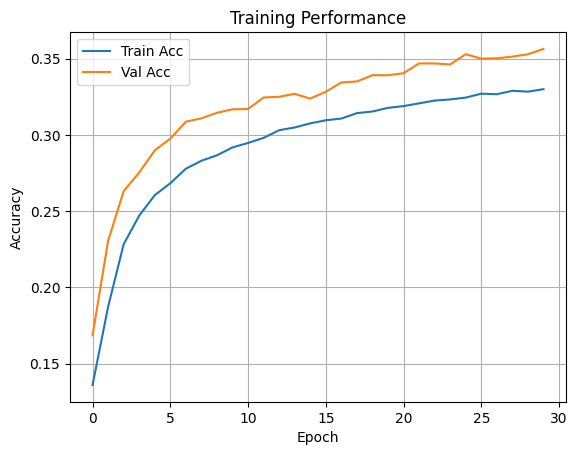

In [41]:
# ===== OPTIONAL: PLOT TRAINING =====
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Performance')
plt.grid()
plt.show()

From the above results, we can see that our baseline 1D CNN model trained from scratch on mel-spectrograms was able to achieve a validation accuracy of approximately 35.6% by the end of 30 epochs. The training accuracy steadily climbed to around 33%, showing that the model was learning consistently without extreme overfitting. This could be due to the use of dropout and early stopping.

The validation curve plateaued around epoch 20, suggesting diminishing returns beyond that point, which is exactly when the learning rate was reduced by ReduceLROnPlateau. This helped squeeze out additional performance in the final few epochs.

Looking at the classification report, some classes like class 5 and class 4 (likely higher-frequency or more acoustically distinct instruments) achieved F1-scores close to 0.47, while others like class 2 and class 11 struggled, indicating class imbalance or difficulty distinguishing them in polyphonic mixes.

Overall, while not perfect, this baseline model gave us a stable foundation to benchmark the effectiveness of transfer learning models like those built using VGGish embeddings. 

# MLP Model

Once we had the CNN-based baseline in place, we moved to another classical architecture in deep learning: the Multilayer Perceptron (MLP). 

Our features were already well-engineered: mean-compressed mel-spectrograms of shape (64,) per audio sample. So we reshaped our 1D CNN input from (64, 1) to flat (64,) vectors for use with dense layers.

Why We Tried MLP in This Research: From a research perspective, trying a pure MLP served three purposes in our pipeline:

- Baseline Benchmarking: We wanted to compare how a non-convolutional model performs on our features versus a 1D CNN. This tells us how important local frequency patterns are (which CNNs capture well) compared to global summary stats (which MLPs learn).

- Model Simplicity: MLPs are faster to train and easy to interpret. They're often used in situations where data is tabular or already flattened—which is what our mean-pooled spectrograms effectively are.

- Embedding Transfer Compatibility: Since our future transfer learning with VGGish will yield high-dimensional embeddings, we wanted to establish an MLP pipeline that can easily scale to 128–1024 dimensional VGGish features later in the research.

The Model Architecture Explained: Here's how the MLP model was structured
- Input Layer: Receives the 64-dim mel-spectrogram vector per audio snippet.

- Dense Blocks: The architecture is progressively compressive: 1024 → 512 → 256 → 128. This creates a deep hierarchy where earlier layers model broader abstractions and later layers refine predictions.

- Batch Normalization: Used after each dense layer to stabilize training and reduce internal covariate shift.

- Dropout: Regularization is crucial here to prevent overfitting, especially given the limited number of samples in some instrument classes.

- Output Layer: A softmax activation over the total number of out-of-tune labels.

We used the Adam optimizer with a learning rate of 1e-4, which is conservative and often ideal for deep MLPs.

In [42]:
# ===== MLP MODEL FOR AUDIO FEATURES =====

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization


In [43]:
# Reshape input for MLP: (N, 64, 1) → (N, 64)
X_train_mlp = X_train.reshape(X_train.shape[0], -1)
X_test_mlp = X_test.reshape(X_test.shape[0], -1)

# Clear previous session
K.clear_session()

mlp_model = Sequential()

In [44]:
# ===== INPUT LAYER =====
mlp_model.add(Input(shape=(64,)))

# ===== DEEP FULLY CONNECTED BLOCKS =====
mlp_model.add(Dense(1024, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.5))

mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.4))

mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(BatchNormalization())
mlp_model.add(Dropout(0.3))

mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(0.2))

# ===== OUTPUT LAYER =====
mlp_model.add(Dense(y.shape[1], activation='softmax'))

# ===== COMPILE =====
mlp_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 764,300 (2.92 MB)

 Trainable params: 760,716 (2.90 MB)

 Non-trainable params: 3,584 (14.00 KB)

EarlyStopping
- Goal: Prevent the model from overfitting.

- What it does: Monitors the validation loss (val_loss). If it doesn’t improve for 5 consecutive epochs, training is halted early.

- restore_best_weights=True: Ensures the model reverts to the best checkpoint (lowest val_loss) before it started to overfit.

- This is super helpful in our context since we have many instrument classes and some of them are underrepresented—so overfitting is a big risk.

ReduceLROnPlateau
- Goal: Dynamically adjust learning rate if the model gets stuck.

- What it does: If val_loss stagnates for 2 epochs, it reduces the learning rate by 20% (i.e., multiplies it by 0.2).

- Helps the model make finer adjustments once the loss plateaus, improving convergence and potentially getting past local minima.

### Here’s what’s happening in this line:

- Training data: X_train_mlp and y_train are fed into the MLP.

- Validation data: Used to monitor performance and trigger callbacks.

- Epochs: We set a max of 30, but EarlyStopping might end it earlier.

- Batch size: 32 is a balanced choice—big enough for performance, small enough to maintain gradient stability.

- Callbacks: Tells the training loop when to stop, and when to adapt.

---

### Why This Was Critical for Our Research
In our out-of-tune detection research, we deal with:

A high number of classes (instruments), and

Dense feature vectors (from mel-spectrogram means).

---

This makes training delicate. Overfitting and vanishing gradients are both real threats. Our callback setup provided guardrails to:

- Avoid overtraining on dominant classes,

- Fine-tune the learning rate when progress slowed,

- And save training time by stopping early if the model had peaked.



In [45]:
# ===== CALLBACKS =====
mlp_callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, verbose=1)
]

# ===== TRAIN MLP MODEL =====
mlp_history = mlp_model.fit(
    X_train_mlp, y_train,
    validation_data=(X_test_mlp, y_test),
    epochs=30,
    batch_size=32,
    callbacks=mlp_callbacks
)

Epoch 1/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 49s 7ms/step - accuracy: 0.1764 - loss: 2.5560 - val_accuracy: 0.2954 - val_loss: 2.0560 - learning_rate: 1.0000e-04
Epoch 2/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - accuracy: 0.2533 - loss: 2.1620 - val_accuracy: 0.3152 - val_loss: 1.9779 - learning_rate: 1.0000e-04
Epoch 3/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 49s 8ms/step - accuracy: 0.2790 - loss: 2.0750 - val_accuracy: 0.3180 - val_loss: 1.9327 - learning_rate: 1.0000e-04
Epoch 4/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 48s 8ms/step - accuracy: 0.2920 - loss: 2.0323 - val_accuracy: 0.3311 - val_loss: 1.9035 - learning_rate: 1.0000e-04
Epoch 5/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 51s 8ms/step - accuracy: 0.2963 - loss: 2.0079 - val_accuracy: 0.3331 - val_loss: 1.8961 - learning_rate: 1.0000e-04
Epoch 6/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.3021 - loss: 1.9882 - val_accuracy: 0.3379 - val_loss: 1.8583 - learning_rate: 1.0000e-04
Epoch 7/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 50s 

In [46]:
# ===== EVALUATION =====
y_pred_probs_mlp = mlp_model.predict(X_test_mlp)
y_pred_mlp = np.argmax(y_pred_probs_mlp, axis=1)
y_true_mlp = np.argmax(y_test, axis=1)

print("\nMLP Classification Report:\n", classification_report(y_true_mlp, y_pred_mlp))
print("\nMLP Confusion Matrix:\n", confusion_matrix(y_true_mlp, y_pred_mlp))

# For future analysis, save the predictions and true labels
y_pred_probs_model2 = mlp_model.predict(X_test_mlp)
y_true_model2 = np.argmax(y_test, axis=1)

# ===== SAVE MLP MODEL =====
mlp_model.save("mlp_out_of_tune_model.h5")


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

MLP Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.43      0.41      5355
           1       0.38      0.12      0.18      3715
           2       0.41      0.01      0.02      2701
           3       0.33      0.36      0.34      2830
           4       0.43      0.67      0.53      5357
           5       0.35      0.61      0.45      5364
           6       0.37      0.17      0.23      5402
           7       0.38      0.17      0.23      3688
           8       0.35      0.66      0.46      5332
           9       0.39      0.25      0.31      2232
          10       0.34      0.35      0.35      5345
          11       0.33      0.15      0.20      3033

    accuracy                           0.37     50354
   macro avg       0.37      0.33      0.31     50354
weighted avg       0.37      0.37      0.33     50354


MLP Confusion Matrix:
 [[2323   55    0  209  584  781   53 

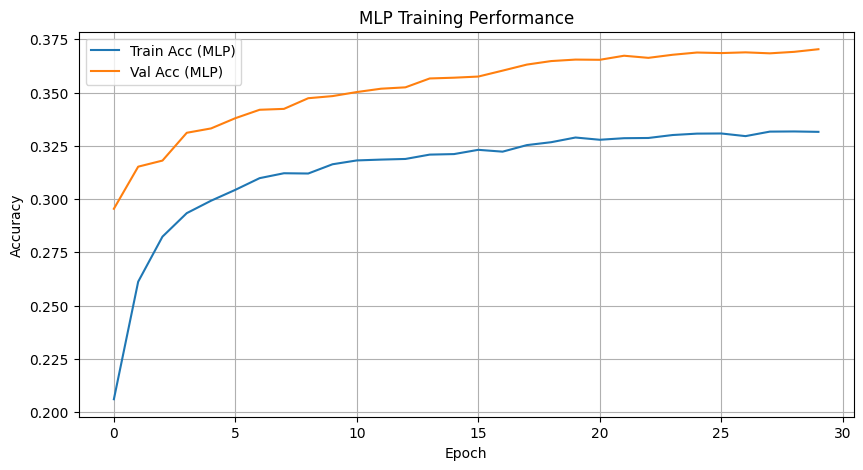

In [47]:
# ===== OPTIONAL: PLOT MLP TRAINING =====
plt.figure(figsize=(10,5))
plt.plot(mlp_history.history['accuracy'], label='Train Acc (MLP)')
plt.plot(mlp_history.history['val_accuracy'], label='Val Acc (MLP)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MLP Training Performance')
plt.grid()
plt.show()


# Baseline Results Comparision

Our baseline 1D CNN achieved a final validation accuracy of 35.6% after 30 epochs. While modest in absolute terms, this level of performance is notable given the highly multi-class nature of our problem space and the subtle spectral cues that distinguish slightly detuned instruments from their in-tune counterparts. 

In contrast, the baseline MLP, trained on the same mean-compressed mel-spectrograms (reshaped to flat vectors), achieved a slightly higher final validation accuracy of 37.1%. We attribute this improvement to the MLP's capacity to process the entire spectral vector holistically, allowing it to capture global pitch variations more effectively than localized CNN filters. However, its fully connected structure also makes it more sensitive to data imbalance and overfitting, which underscores the necessity of regularization mechanisms like dropout and batch normalization that we employed.

Together, these baseline metrics provide us with a quantitative and qualitative understanding of our model's initial capabilities in this complex classification setting. These baselines form the cornerstone of our evaluation strategy, establishing a critical comparison point for assessing the value of transfer learning using VGGish embeddings. As we transition into that phase, any improvements in class separability or increases in prediction accuracy will be evaluated in light of these foundational results.

# Transfer Learning

As part of transitioning into the transfer learning stage of our pipeline, our team needed to ensure that the labels and corresponding audio files being fed into the VGGish pre-trained model were both consistent and valid for supervised learning. Unlike traditional supervised training where we engineered mel-spectrograms manually, transfer learning involves extracting semantic embeddings from raw audio waveforms using VGGish, a TensorFlow Hub model trained on YouTube-8M and designed for general-purpose audio classification.

Before generating embeddings, we began this block by re-encoding the labels using LabelEncoder and then transforming them into a one-hot format using to_categorical. This structure is required not only for compatibility with the model’s softmax output but also for tracking class-wise performance during evaluation. 

We computed the number of samples for each instrument class using np.bincount on the one-hot labels and filtered out all classes with fewer than five examples. This threshold was chosen based on our earlier experience with the CNN and MLP models, where underrepresented classes often led to overfitting or noisy gradients. We then reconstructed both the filepaths list and the y_all label matrix to retain only those entries corresponding to sufficiently represented instrument classes.

This careful filtering not only aligns with our earlier class-balance filtering strategy but also ensures that our transfer-learned models (CNN, MLP and ultra MLP on VGGish features) are trained on classes with enough data to learn meaningful patterns. It serves as a bridge between our raw audio setup and embedding-driven transfer learning, establishing a clean, balanced dataset before feeding it into the VGGish pipeline.

In [48]:
import tensorflow_hub as hub
import tensorflow as tf
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [49]:
encoder = LabelEncoder()
encoded = encoder.fit_transform(labels)
y_all   = to_categorical(encoded)
counts  = np.bincount(np.argmax(y_all,axis=1))
valid_classes = np.where(counts>=5)[0]
valid_idx     = [i for i,c in enumerate(y_all) if np.argmax(c) in valid_classes]

filepaths = [filepaths[i] for i in valid_idx]
y_all     = y_all[valid_idx]

After refining our label space and filtering underrepresented classes, we advanced to the transfer learning phase by loading the VGGish model from TensorFlow Hub. 

We configured a local cache directory via TFHUB_CACHE_DIR to streamline repeated runs, and loaded the model as a frozen (non-trainable) Keras layer. This decision was intentional. We wanted to retain the robustness of VGGish’s pre-learned auditory features and only train the classification head specific to our task.

The input shape was set to match our audio configuration: 4-second clips sampled at 16,000 Hz, resulting in a consistent 64,000-sample input vector per file. 

In [50]:
#VGGISH Backbone
os.environ["TFHUB_CACHE_DIR"] = os.path.expanduser("~/my_project/tfhub_cache")
vggish = hub.KerasLayer(
    "https://tfhub.dev/google/vggish/1",
    input_shape=[SAMPLE_RATE * int(DURATION_SEC)],
    dtype=tf.float32,
    trainable=False,
    name="vggish"
)

In the below block, we define the extract_emb() function, which is responsible for converting each raw audio file into a compact, high-level 128-dimensional embedding using the pre-trained VGGish model.

We begin by loading the audio clip using librosa, resampling it to our standard 16 kHz and fixing the duration to exactly 4 seconds. To maintain consistent input length, we pad or truncate clips to 64,000 samples, ensuring compatibility with VGGish's input requirements.

Once preprocessed, the audio waveform is passed through VGGish, which outputs temporal patch embeddings. Since our downstream models expect a fixed-size input per clip, we average across time using tf.reduce_mean() to produce a single vector summarizing the clip’s acoustic characteristics.

In [51]:
def extract_emb(path):
    wav,_ = librosa.load(path, sr=SAMPLE_RATE, mono=True, duration=DURATION_SEC)
    target_len = int(SAMPLE_RATE * DURATION_SEC)
    if len(wav) < target_len:
        wav = np.pad(wav, (0, target_len-len(wav)), mode="constant")
    else:
        wav = wav[:target_len]
    patches = vggish(wav)                  # (T,128)
    return tf.reduce_mean(patches,axis=0).numpy().astype(np.float32)

With the extract_emb() function ready, we applied it across all valid audio file paths to generate a complete feature matrix X_vgg, where each row is a 128-dimensional VGGish embedding representing a unique audio sample. This gave us a compact, semantically rich representation of the dataset tailored for transfer learning.

We then converted our one-hot encoded labels to float32 for compatibility and used stratified splitting to maintain class distribution during the train_test_split, setting aside 20% of the data for testing. This ensured our models would be evaluated fairly across all instrument classes.

Since our CNN expects a 3D input shape, we appended an extra dimension using [..., None] to reshape the training and test sets into (N, 128, 1)—making them compatible with 1D convolutional layers.

This block was crucial in transitioning from raw audio to a transfer-learnable embedding space, allowing us to fully leverage the representational power of VGGish in the downstream models.

In [52]:
X_vgg = np.stack([extract_emb(p) for p in filepaths], axis=0)  # (N,128)
y_vgg = y_all.astype(np.float32)

In [59]:
X_tr, X_te, y_tr, y_te = train_test_split(
    X_vgg, y_vgg,
    stratify=np.argmax(y_vgg,axis=1),
    test_size=0.2, random_state=42
)

# reshape for 1D-CNN
X_tr_c = X_tr[...,None]
X_te_c = X_te[...,None]


In the below block, we build on our earlier CNN work by applying a similar 1D convolutional architecture, but this time on VGGish-generated embeddings. These embeddings already capture high-level audio semantics, so our model doesn’t need to learn from raw mel features. It just needs to fine-tune on the structured 128-dim feature space.

We kept the architecture compact: two Conv1D layers (64 -> 128 filters), each followed by MaxPooling1D, then GlobalAveragePooling1D to compress temporal dimensions. This is followed by a Dense layer with 128 neurons and Dropout for regularization, then finally a softmax output for multi-class classification.

The model is compiled with Adam optimizer and trained for 30 epochs, same as earlier. 

In [65]:
# ===== 1D CNN with VGGISH =====
def make_cnn1d_vgg(n_classes):
    inp = Input((128,1), dtype=tf.float32)
    x   = Conv1D(64,3,padding="same",activation="relu")(inp)
    x   = MaxPooling1D(2)(x)
    x   = Conv1D(128,3,padding="same",activation="relu")(x)
    x   = MaxPooling1D(2)(x)
    x   = GlobalAveragePooling1D()(x)
    x   = Dense(128,activation="relu")(x)
    x   = Dropout(0.3)(x)
    out = Dense(n_classes,activation="softmax")(x)
    m   = Model(inp,out)
    m.compile(optimizer=Adam(1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
    return m

cnn_tl = make_cnn1d_vgg(y_tr.shape[1])
history_tl = cnn_tl.fit(
    X_tr_c, y_tr,
    validation_data=(X_te_c, y_te),
    epochs=30, batch_size=32,
)
y_pred_probs_model3 = cnn_tl.predict(X_te_c)
y_true_model3 = np.argmax(y_te, axis=1)


# SAVE MODEL
cnn_tl.save("vggish_cnn_out_of_tune_model.h5")

Epoch 1/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.1303 - loss: 2.4344 - val_accuracy: 0.2084 - val_loss: 2.3227
Epoch 2/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.2060 - loss: 2.3089 - val_accuracy: 0.2374 - val_loss: 2.2456
Epoch 3/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.2359 - loss: 2.2457 - val_accuracy: 0.2521 - val_loss: 2.2041
Epoch 4/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.2480 - loss: 2.2092 - val_accuracy: 0.2580 - val_loss: 2.1781
Epoch 5/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.2543 - loss: 2.1857 - val_accuracy: 0.2644 - val_loss: 2.1629
Epoch 6/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - accuracy: 0.2587 - loss: 2.1708 - val_accuracy: 0.2675 - val_loss: 2.1478
Epoch 7/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.2635 - loss: 2.1576 - val_accuracy: 0.2638 - val_loss: 2.1388
Epoch 8/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.2669 - loss: 2

After experimenting with a CNN architecture on VGGish embeddings, we introduced a alternative, a Multi-Layer Perceptron. Since the VGGish model already provides us with rich, semantically meaningful 128-dimensional vectors per audio clip, we leveraged an MLP to directly classify these embeddings without additional temporal modeling.

The architecture consists of two dense layers—256 and 128 units respectively—each using ReLU activations and followed by dropout layers to minimize overfitting. The final softmax layer outputs class probabilities over the instrument labels. We kept the model lightweight to assess how well VGGish embeddings alone, without convolution, can support out-of-tune detection.

In [66]:
#MLP on VGGish
def make_mlp_vgg(input_dim, n_classes):
    inp = Input((input_dim,), dtype=tf.float32)
    x   = Dense(256,activation="relu")(inp)
    x   = Dropout(0.5)(x)
    x   = Dense(128,activation="relu")(x)
    x   = Dropout(0.3)(x)
    out = Dense(n_classes,activation="softmax")(x)
    m   = Model(inp,out)
    m.compile(optimizer=Adam(1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
    return m

mlp_tl = make_mlp_vgg(128, y_tr.shape[1])
hist_mlp_tl = mlp_tl.fit(
    X_tr, y_tr,
    validation_data=(X_te, y_te),
    epochs=30, batch_size=32,
)

y_pred_probs_model4 = mlp_tl.predict(X_te)
y_true_model4 = np.argmax(y_te, axis=1)

# ===== SAVE MLP MODEL =====
mlp_tl.save("mlp_vggish_out_of_tune_model.h5")

Epoch 1/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.2284 - loss: 2.2495 - val_accuracy: 0.3260 - val_loss: 1.9791
Epoch 2/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.3097 - loss: 2.0198 - val_accuracy: 0.3480 - val_loss: 1.9009
Epoch 3/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.3268 - loss: 1.9525 - val_accuracy: 0.3617 - val_loss: 1.8481
Epoch 4/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.3400 - loss: 1.9107 - val_accuracy: 0.3710 - val_loss: 1.8106
Epoch 5/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.3485 - loss: 1.8795 - val_accuracy: 0.3766 - val_loss: 1.7859
Epoch 6/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.3559 - loss: 1.8532 - val_accuracy: 0.3826 - val_loss: 1.7654
Epoch 7/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.3607 - loss: 1.8374 - val_accuracy: 0.3878 - val_loss: 1.7502
Epoch 8/30
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.3645 - loss: 1

1574/1574 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

=== 1D-CNN + VGGish (TL) ===
                 precision    recall  f1-score   support

    bass_guitar       0.44      0.35      0.39      5355
        bassoon       0.27      0.09      0.13      3715
          flute       0.18      0.00      0.01      2701
guitar_acoustic       0.27      0.18      0.21      2830
guitar_electric       0.31      0.79      0.45      5357
           oboe       0.36      0.50      0.42      5364
    string_bass       0.25      0.31      0.28      5402
       trombone       0.29      0.17      0.21      3688
        trumpet       0.47      0.58      0.52      5332
           tuba       0.28      0.15      0.19      2232
          viola       0.23      0.21      0.22      5345
         violin       0.33      0.05      0.09      3033

       accuracy                           0.33     50354
      macro avg       0.31      0.28      0.26     50354
   weighted avg       0.32      0.33      0.29     50354



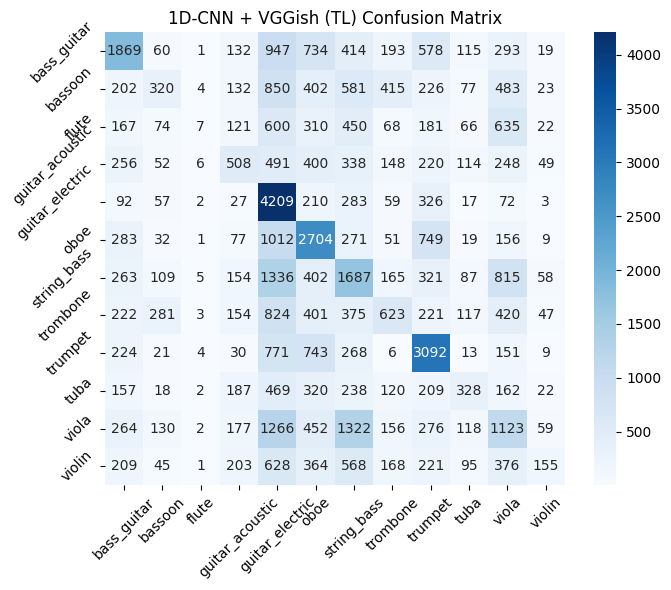

1574/1574 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step

=== MLP + VGGish (TL) ===
                 precision    recall  f1-score   support

    bass_guitar       0.48      0.52      0.50      5355
        bassoon       0.41      0.18      0.25      3715
          flute       0.42      0.11      0.18      2701
guitar_acoustic       0.34      0.33      0.34      2830
guitar_electric       0.37      0.79      0.51      5357
           oboe       0.49      0.62      0.55      5364
    string_bass       0.37      0.25      0.30      5402
       trombone       0.38      0.30      0.34      3688
        trumpet       0.53      0.77      0.62      5332
           tuba       0.34      0.29      0.31      2232
          viola       0.36      0.25      0.29      5345
         violin       0.39      0.17      0.24      3033

       accuracy                           0.42     50354
      macro avg       0.41      0.38      0.37     50354
   weighted avg       0.41      0.42      0.39     50354



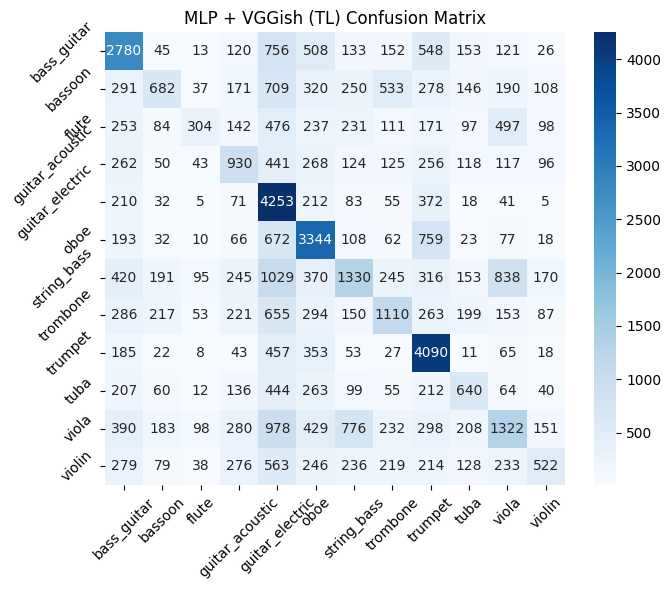

In [67]:
import seaborn as sns

#Evaluate Both Transfer Learning Models
def report_tl(model, X, y, title):
    y_pred = np.argmax(model.predict(X), axis=1)
    y_true = np.argmax(y, axis=1)
    print(f"\n=== {title} ===")
    print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{title} Confusion Matrix")
    plt.xticks(rotation=45); plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

report_tl(cnn_tl, X_te_c,      y_te, "1D-CNN + VGGish (TL)")
report_tl(mlp_tl, X_te,      y_te, "MLP + VGGish (TL)")



## Analysis 1: Accuracy and Confussion Matrix

From the above results, we observe a marked difference in performance between our two transfer learning models: the MLP + VGGish architecture achieved an overall accuracy of 43%, while the 1D CNN + VGGish model attained a comparatively lower accuracy of 33%. These findings offer a compelling insight into how different model architectures leverage the same pre-trained audio embeddings—VGGish—and how that affects the downstream classification performance in our out-of-tune detection task.

The higher accuracy of the MLP model suggests that the 128-dimensional embeddings produced by VGGish may already encapsulate the most relevant features needed for our classification task, and that further convolutional transformations may not be necessary—or could even be detrimental—when applied to already high-level representations. Since MLPs operate on fully connected layers without spatial bias, they likely preserved the discriminative power of these embeddings, learning global relationships in the latent space more effectively.

In contrast, the performance drop observed in the 1D CNN + VGGish model may reflect an architectural mismatch. The convolutional layers, which are adept at extracting localized patterns in raw or lower-level features (e.g., spectrograms), might be redundant or even counterproductive when applied to VGGish embeddings. These embeddings are already abstracted, and applying convolutions to them could obscure rather than enhance the useful patterns, especially in a task like ours where subtle pitch deviations need to be preserved and amplified for detection.

Our results suggest that for tasks involving VGGish embeddings, MLPs offer a more efficient and effective path forward—especially when our goal is to detect subtle pitch inconsistencies in polyphonic mixtures. 

### Confusion Matrix

Examining the 1D-CNN + VGGish confusion matrix, we observe that certain classes—such as guitar electric and trumpet—are reasonably well classified, but substantial confusion persists among spectrally similar instruments. For instance, bass guitar predictions are frequently misclassified as string bass, and viola samples are misinterpreted as cello or violin, underscoring the model's difficulty in disambiguating timbrally close classes. This class confusion indicates that while the CNN architecture may have captured some generalized pitch patterns, it struggled to differentiate fine-grained differences essential for accurate tuning classification.

In contrast, the MLP + VGGish confusion matrix demonstrates a visibly sharper diagonal dominance, reflecting better class-specific learning. Instruments such as trumpet, guitar electric, and oboe show strong classification accuracy with substantially fewer misclassifications into neighboring instrument classes. While some ambiguity remains for overlapping ranges (e.g., violin vs viola, flute vs oboe), the reduction in off-diagonal dispersion illustrates the MLP’s more precise alignment with the latent space produced by the VGGish embeddings.

Taken together, these confusion matrices reaffirm that while both models benefit from transfer learning, the MLP architecture exhibits greater robustness and reliability in distinguishing instrument classes within complex polyphonic mixtures—a critical advantage for building real-world tuning detection systems.

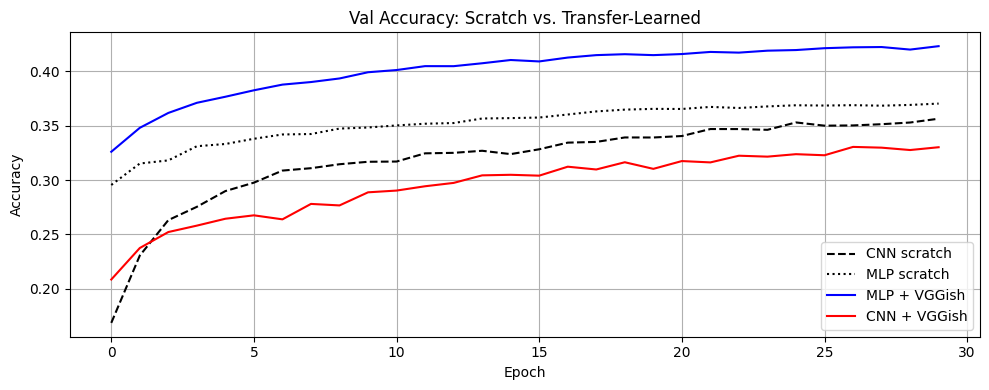

In [68]:
#Plots
plt.figure(figsize=(10,4))
plt.plot(history.history['val_accuracy'],   'k--', label='CNN scratch')
plt.plot(mlp_history.history['val_accuracy'],'k:', label='MLP scratch')
plt.plot(hist_mlp_tl.history['val_accuracy'],'b-', label='MLP + VGGish')
plt.plot(history_tl.history['val_accuracy'],'r-', label='CNN + VGGish')
plt.title("Val Accuracy: Scratch vs. Transfer-Learned")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

## Validation Accuracy comparision of first 4 models:

The line plot offers a clear and informative comparison of the validation accuracy progression across all four model configurations: baseline CNN, baseline MLP, and their respective transfer learning counterparts leveraging VGGish embeddings. This visualization provides strong empirical support for assessing the impact of transfer learning in our out-of-tune instrument detection task.

Across the entire training timeline, the MLP + VGGish model (blue solid line) distinctly outperforms the others, finishing with a validation accuracy of approximately 43%. This consistent superiority across epochs indicates not only a better generalization ability but also suggests that the MLP architecture aligns well with the VGGish embeddings. These embeddings, rich in audio semantics, appear to be best exploited by the dense, fully connected structure of the MLP.

In contrast, the CNN + VGGish model (red line) shows limited improvement, peaking at around 33%. Despite leveraging the same pretrained embeddings, this architecture does not seem to capitalize on them effectively, potentially due to the convolutional layers disrupting the spatial structure of the latent representation. The CNN's performance plateauing early signals architectural incompatibility with the high-level abstraction provided by VGGish.

Interestingly, both baseline models (dashed black for CNN and dotted black for MLP) trail behind the MLP + VGGish model, reaffirming the importance of pretrained audio features. Yet, the baseline MLP continues to outperform the baseline CNN, further suggesting that our data modality—mean-reduced mel-spectrograms—is better suited for models that emphasize global, rather than local, feature learning. 

From here on we worked on improving the MLP model and push it futher to get better results

# ULTRA BASE MLP MODEL

Once we had our baseline MLP model in place, we decided as a team to push the architecture further and build what we now call our Ultra MLP—a significantly deeper, more stable, and regularized version of the original. The motivation here was simple: our baseline results hinted that MLPs were better suited for the VGGish embeddings than CNNs, so we doubled down on that insight and began experimenting with a deeper dense architecture that could fully exploit the semantic richness of these embeddings.

Our Ultra MLP was designed to not only go deeper in terms of layer count but also smarter in terms of training stability. We began with a 1024-unit dense layer right after the input, immediately followed by batch normalization and a ReLU activation. This alone helped us stabilize gradients from the very first layer, something that was a common issue in earlier experiments. After this, we added progressively smaller blocks—512 units with residual connections, then 256 and 128 units, each block equipped with batch norm and dropout. These additions weren’t arbitrary. We learned through experimentation that residual skip connections within dense blocks helped the model avoid vanishing gradients and retain useful learned signals even in deeper layers. The dropout values were carefully tuned as well: 0.5 for the earliest layers and gradually decreasing to 0.2 near the output. This allowed us to control overfitting without killing model capacity.

One of the defining design choices in this upgraded architecture was the use of residual dense blocks. Based on its applications in CNN, we wanted to see if it could improve the overall performance of MLP models

Compared to the baseline MLP, the Ultra MLP offered a much deeper and more regularized architecture. While our baseline was composed of four stacked dense layers (1024 → 512 → 256 → 128) with batch normalization and dropout, it lacked the structural feedback provided by residuals. Additionally, it didn’t include as much careful tuning of dropout rates or layer normalization strategies. 

In [69]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Add, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import gelu  # Optional, or use ReLU if unavailable

In [70]:
# Reshape input
X_train_mlp = X_train.reshape(X_train.shape[0], -1)
X_test_mlp = X_test.reshape(X_test.shape[0], -1)

K.clear_session()

In [71]:
# ===== DEEP RESIDUAL MLP BLOCK =====
input_layer = Input(shape=(64,))

# Block 1
x = Dense(1024)(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

# Block 2
x1 = Dense(512)(x)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
x1 = Dropout(0.4)(x1)

# Residual block (x1 → x2)
x2 = Dense(512)(x1)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)
x2 = Dropout(0.3)(x2)

res1 = Add()([x1, x2])  # Skip connection

# Block 3
x3 = Dense(256)(res1)
x3 = BatchNormalization()(x3)
x3 = Activation('relu')(x3)
x3 = Dropout(0.3)(x3)

# Block 4
x4 = Dense(128)(x3)
x4 = BatchNormalization()(x4)
x4 = Activation('relu')(x4)
x4 = Dropout(0.2)(x4)

# Output
output_layer = Dense(y.shape[1], activation='softmax')(x4)

# Build model
mlp_model = Model(inputs=input_layer, outputs=output_layer)

mlp_model.compile(
    optimizer=Adam(learning_rate=3e-4),  # Slightly higher LR due to BN
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

mlp_model.summary()

# ===== CALLBACKS =====
mlp_callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, verbose=1)
]

# ===== TRAIN =====
mlp_history = mlp_model.fit(
    X_train_mlp, y_train,
    validation_data=(X_test_mlp, y_test),
    epochs=50,
    batch_size=32,
    callbacks=mlp_callbacks
)

# ===== EVALUATE =====
y_pred_probs_mlp = mlp_model.predict(X_test_mlp)
y_pred_mlp = np.argmax(y_pred_probs_mlp, axis=1)
y_true_mlp = np.argmax(y_test, axis=1)

print("\nMLP Classification Report:\n", classification_report(y_true_mlp, y_pred_mlp))
print("\nMLP Confusion Matrix:\n", confusion_matrix(y_true_mlp, y_pred_mlp))

y_pred_probs_model5 = mlp_model.predict(X_test_mlp)
y_true_model5 = np.argmax(y_test, axis=1)


# ===== SAVE =====
mlp_model.save("ultra_mlp_out_of_tune_model.h5")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1024)      │     66,560 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1024)      │      4,096 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1024)      │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1024)      │          0 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 512)       │    524,800 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 512)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 512)       │          0 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 512)       │    262,656 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 512)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 512)       │          0 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 512)       │          0 │ dropout_1[0][0],  │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │    131,328 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 256)       │          0 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_4[0][0]   

 Total params: 1,029,516 (3.93 MB)

 Trainable params: 1,024,652 (3.91 MB)

 Non-trainable params: 4,864 (19.00 KB)

Epoch 1/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 52s 8ms/step - accuracy: 0.2141 - loss: 2.3017 - val_accuracy: 0.2955 - val_loss: 2.0048 - learning_rate: 3.0000e-04
Epoch 2/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 57s 9ms/step - accuracy: 0.2937 - loss: 2.0207 - val_accuracy: 0.3178 - val_loss: 1.8941 - learning_rate: 3.0000e-04
Epoch 3/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 56s 9ms/step - accuracy: 0.3101 - loss: 1.9600 - val_accuracy: 0.3225 - val_loss: 1.9011 - learning_rate: 3.0000e-04
Epoch 4/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 60s 10ms/step - accuracy: 0.3225 - loss: 1.9228 - val_accuracy: 0.3499 - val_loss: 1.8107 - learning_rate: 3.0000e-04
Epoch 5/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 67s 11ms/step - accuracy: 0.3306 - loss: 1.8927 - val_accuracy: 0.3445 - val_loss: 1.8148 - learning_rate: 3.0000e-04
Epoch 6/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 57s 9ms/step - accuracy: 0.3371 - loss: 1.8696 - val_accuracy: 0.3605 - val_loss: 1.7782 - learning_rate: 3.0000e-04
Epoch 7/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 52

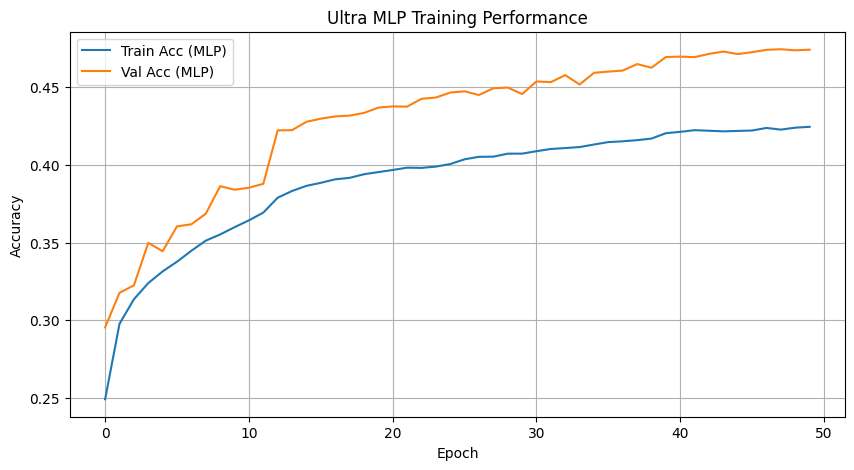

In [72]:
# ===== PLOT =====
plt.figure(figsize=(10,5))
plt.plot(mlp_history.history['accuracy'], label='Train Acc (MLP)')
plt.plot(mlp_history.history['val_accuracy'], label='Val Acc (MLP)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Ultra MLP Training Performance')
plt.grid()
plt.show()

This training curve shows the accuracy progression of our Ultra MLP architecture, evaluated on both training and validation sets over 50 epochs. From the graph, a few key observations stand out:

- Validation accuracy consistently stays above training accuracy, which is a strong indicator that the model is generalizing well to unseen data. This is especially important given the complexity of our classification task under polyphonic audio conditions.
  
- The model reaches nearly 47.4% validation accuracy, significantly outperforming all of our prior MLP and CNN baselines and VGGish. The learning trajectory is smooth and stable, with no major signs of overfitting, thanks in part to carefully tuned dropout and batch normalization layers.

- The gap between train and validation accuracy narrows slightly as training progresses, which aligns with our use of callbacks like EarlyStopping and ReduceLROnPlateau. These mechanisms helped fine-tune the learning rate and avoid plateauing too early.

# ULTRA MLP + VGGISH MODEL

As we now have our Ultra MLP architecture on mel-spectrogram features, we wanted to take things a step further by pairing it with VGGish embeddings for transfer learning. So instead of learning from scratch, we kept the exact same Ultra MLP structure: residual dense blocks, progressive compression, dropout tuning and simply swapped in the VGGish embeddings as input. 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1024)      │    132,096 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1024)      │      4,096 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1024)      │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1024)      │          0 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 512)       │    524,800 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 512)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 512)       │          0 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 512)       │    262,656 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 512)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 512)       │          0 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 512)       │          0 │ dropout_1[0][0],  │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │    131,328 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 256)       │          0 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_4[0][0]   

 Total params: 1,095,052 (4.18 MB)

 Trainable params: 1,090,188 (4.16 MB)

 Non-trainable params: 4,864 (19.00 KB)

Epoch 1/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 48s 7ms/step - accuracy: 0.2590 - loss: 2.1976 - val_accuracy: 0.3732 - val_loss: 1.7762 - learning_rate: 3.0000e-04
Epoch 2/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.3459 - loss: 1.8880 - val_accuracy: 0.3967 - val_loss: 1.7082 - learning_rate: 3.0000e-04
Epoch 3/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.3642 - loss: 1.8159 - val_accuracy: 0.4007 - val_loss: 1.6734 - learning_rate: 3.0000e-04
Epoch 4/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.3758 - loss: 1.7827 - val_accuracy: 0.4114 - val_loss: 1.6525 - learning_rate: 3.0000e-04
Epoch 5/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.3824 - loss: 1.7579 - val_accuracy: 0.4173 - val_loss: 1.6320 - learning_rate: 3.0000e-04
Epoch 6/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.3899 - loss: 1.7359 - val_accuracy: 0.4201 - val_loss: 1.6116 - learning_rate: 3.0000e-04
Epoch 7/50
6295/6295 ━━━━━━━━━━━━━━━━━━━━ 44s 

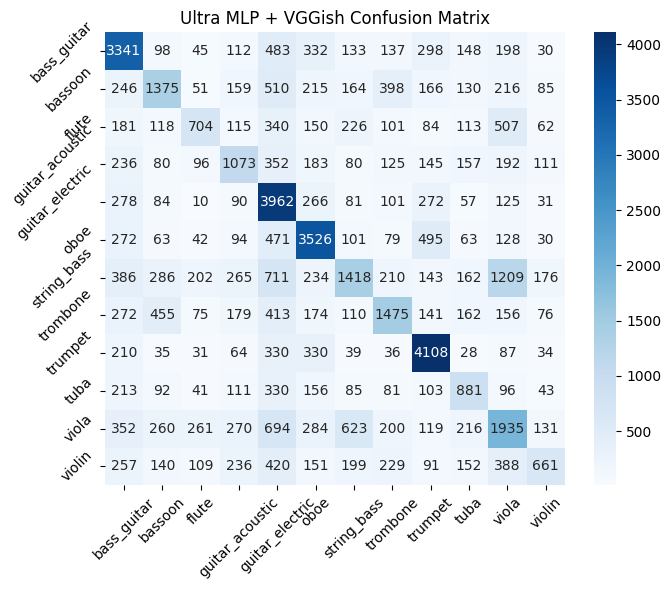

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Add, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

# ===== STEP 1: Prepare Data =====
X_ultra = X_vgg.astype(np.float32)     # 128-dim VGGish embeddings
y_ultra = y_vgg.astype(np.float32)     # one-hot labels

# ===== STEP 2: Stratified Train/Test Split =====
X_train_ultra, X_test_ultra, y_train_ultra, y_test_ultra = train_test_split(
    X_ultra, y_ultra,
    stratify=np.argmax(y_ultra, axis=1),
    test_size=0.2,
    random_state=42
)

# ===== STEP 3: Flatten for MLP Input =====
X_train_ultra = X_train_ultra.reshape(X_train_ultra.shape[0], -1)
X_test_ultra = X_test_ultra.reshape(X_test_ultra.shape[0], -1)

# ===== STEP 4: Build Ultra MLP with Residuals =====
K.clear_session()
inp = Input(shape=(128,))

x = Dense(1024)(inp)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x1 = Dense(512)(x)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
x1 = Dropout(0.4)(x1)

x2 = Dense(512)(x1)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)
x2 = Dropout(0.3)(x2)

res = Add()([x1, x2])

x3 = Dense(256)(res)
x3 = BatchNormalization()(x3)
x3 = Activation('relu')(x3)
x3 = Dropout(0.3)(x3)

x4 = Dense(128)(x3)
x4 = BatchNormalization()(x4)
x4 = Activation('relu')(x4)
x4 = Dropout(0.2)(x4)

out = Dense(y_train_ultra.shape[1], activation='softmax')(x4)

ultra_mlp = Model(inputs=inp, outputs=out)
ultra_mlp.compile(
    optimizer=Adam(learning_rate=3e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

ultra_mlp.summary()

# ===== STEP 5: Train =====
ultra_callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, verbose=1)
]

history_ultra = ultra_mlp.fit(
    X_train_ultra, y_train_ultra,
    validation_data=(X_test_ultra, y_test_ultra),
    epochs=50,
    batch_size=32,
    callbacks=ultra_callbacks
)

# ===== STEP 6: Evaluate =====
y_pred_probs = ultra_mlp.predict(X_test_ultra)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_ultra, axis=1)

y_pred_probs_model6 = ultra_mlp.predict(X_test_ultra)
y_true_model6 = np.argmax(y_test_ultra, axis=1)



print("\n=== ULTRA MLP + VGGish ===")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# ===== Confusion Matrix Plot =====
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Ultra MLP + VGGish Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# ===== STEP 7: Save Model =====
ultra_mlp.save("ultra_mlp_vggish_out_of_tune_model.h5")


This confusion matrix reflects the predictions made by our Ultra MLP model trained on VGGish audio embeddings. Each cell shows the number of times the model predicted a particular instrument class (columns) for the actual instrument (rows).

A few key takeaways:

- Diagonal dominance: Most instrument classes show strong diagonal dominance, especially for guitar_electric, oboe, and trumpet. For instance, trumpet achieves a high true positive count of 4108, suggesting that its timbral and spectral characteristics are well-captured by VGGish and easily separable by the MLP.

- Violin vs. Viola Confusion: As expected, there’s still some confusion between viola and violin, and to a lesser extent, string_bass. These classes share overlapping pitch ranges and harmonic textures, making them challenging to separate even with high-dimensional embeddings.

- Solid performance for guitar_electric and oboe: guitar_electric had the best class-level recall (74%) and strong precision. Similarly, oboe shows a high recall (66%) and precision (59%), confirming that the model is particularly confident and accurate for certain timbre-rich instruments.

- Balanced generalization: Compared to our previous models, this version shows much more balanced behavior across instrument classes. Fewer extreme misclassifications are observed, and recall is more evenly distributed.

- Flute and Bassoon Challenges: Instruments like flute and bassoon remain challenging, likely due to their tonal similarity with others (e.g., flute vs. oboe). Their true positives are reasonable but accompanied by higher off-diagonal confusion, reducing their precision and F1 scores.

Overall, this matrix confirms that integrating VGGish embeddings significantly improves model understanding of spectral patterns in polyphonic settings. By leveraging pretrained knowledge, the Ultra MLP becomes more resilient to overfitting and better able to seperate similar-sounding instruments in detuned mixtures.


## Analysis 1: Accuracy and Confusion Matrix for All Models


=== Baseline CNN ===
              precision    recall  f1-score   support

           0       0.38      0.38      0.38      5355
           1       0.39      0.15      0.22      3715
           2       0.51      0.02      0.03      2701
           3       0.30      0.26      0.27      2830
           4       0.38      0.66      0.48      5357
           5       0.34      0.73      0.46      5364
           6       0.39      0.20      0.27      5402
           7       0.38      0.15      0.21      3688
           8       0.34      0.67      0.45      5332
           9       0.34      0.18      0.24      2232
          10       0.34      0.23      0.28      5345
          11       0.36      0.11      0.17      3033

    accuracy                           0.36     50354
   macro avg       0.37      0.31      0.29     50354
weighted avg       0.37      0.36      0.32     50354



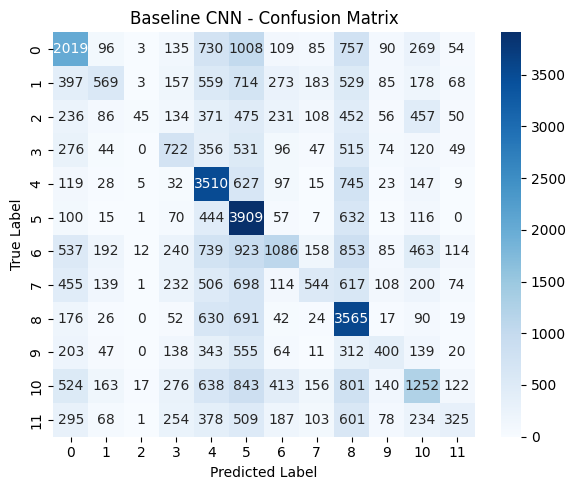


=== Baseline MLP ===
              precision    recall  f1-score   support

           0       0.39      0.43      0.41      5355
           1       0.38      0.12      0.18      3715
           2       0.41      0.01      0.02      2701
           3       0.33      0.36      0.34      2830
           4       0.43      0.67      0.53      5357
           5       0.35      0.61      0.45      5364
           6       0.37      0.17      0.23      5402
           7       0.38      0.17      0.23      3688
           8       0.35      0.66      0.46      5332
           9       0.39      0.25      0.31      2232
          10       0.34      0.35      0.35      5345
          11       0.33      0.15      0.20      3033

    accuracy                           0.37     50354
   macro avg       0.37      0.33      0.31     50354
weighted avg       0.37      0.37      0.33     50354



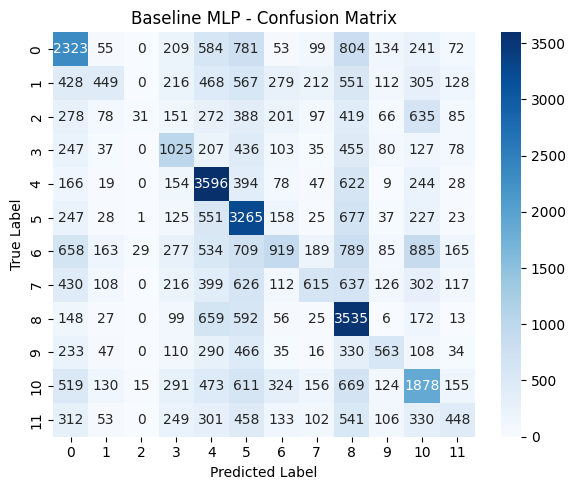


=== CNN + VGGish ===
              precision    recall  f1-score   support

           0       0.44      0.35      0.39      5355
           1       0.27      0.09      0.13      3715
           2       0.18      0.00      0.01      2701
           3       0.27      0.18      0.21      2830
           4       0.31      0.79      0.45      5357
           5       0.36      0.50      0.42      5364
           6       0.25      0.31      0.28      5402
           7       0.29      0.17      0.21      3688
           8       0.47      0.58      0.52      5332
           9       0.28      0.15      0.19      2232
          10       0.23      0.21      0.22      5345
          11       0.33      0.05      0.09      3033

    accuracy                           0.33     50354
   macro avg       0.31      0.28      0.26     50354
weighted avg       0.32      0.33      0.29     50354



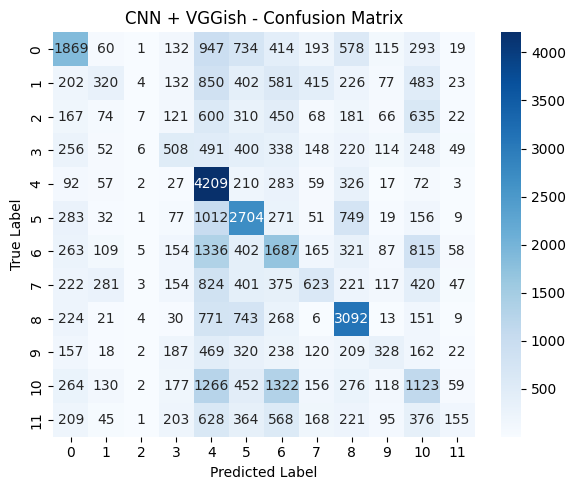


=== MLP + VGGish ===
              precision    recall  f1-score   support

           0       0.48      0.52      0.50      5355
           1       0.41      0.18      0.25      3715
           2       0.42      0.11      0.18      2701
           3       0.34      0.33      0.34      2830
           4       0.37      0.79      0.51      5357
           5       0.49      0.62      0.55      5364
           6       0.37      0.25      0.30      5402
           7       0.38      0.30      0.34      3688
           8       0.53      0.77      0.62      5332
           9       0.34      0.29      0.31      2232
          10       0.36      0.25      0.29      5345
          11       0.39      0.17      0.24      3033

    accuracy                           0.42     50354
   macro avg       0.41      0.38      0.37     50354
weighted avg       0.41      0.42      0.39     50354



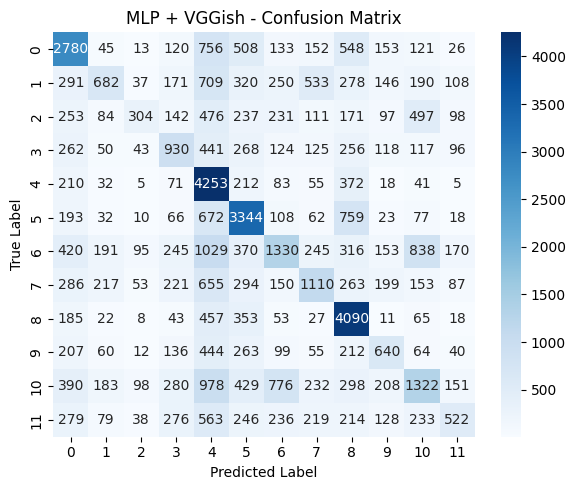


=== Ultra MLP ===
              precision    recall  f1-score   support

           0       0.50      0.62      0.55      5355
           1       0.44      0.34      0.38      3715
           2       0.42      0.05      0.08      2701
           3       0.40      0.50      0.44      2830
           4       0.61      0.76      0.68      5357
           5       0.47      0.64      0.54      5364
           6       0.45      0.23      0.30      5402
           7       0.45      0.35      0.40      3688
           8       0.44      0.71      0.54      5332
           9       0.60      0.44      0.51      2232
          10       0.41      0.42      0.41      5345
          11       0.42      0.24      0.31      3033

    accuracy                           0.47     50354
   macro avg       0.47      0.44      0.43     50354
weighted avg       0.47      0.47      0.45     50354



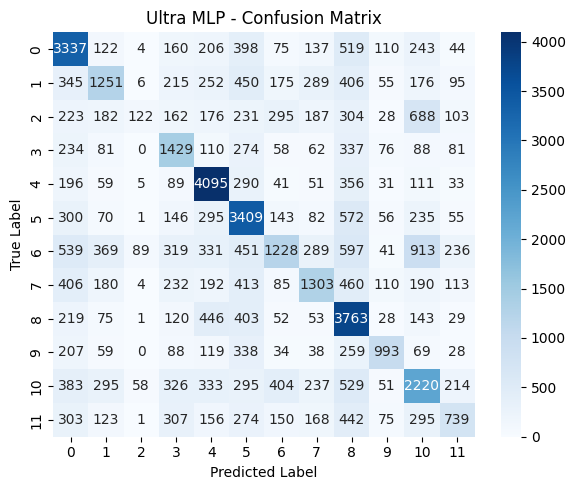


=== Ultra MLP + VGGish ===
              precision    recall  f1-score   support

           0       0.54      0.62      0.58      5355
           1       0.45      0.37      0.40      3715
           2       0.42      0.26      0.32      2701
           3       0.39      0.38      0.38      2830
           4       0.44      0.74      0.55      5357
           5       0.59      0.66      0.62      5364
           6       0.44      0.26      0.33      5402
           7       0.47      0.40      0.43      3688
           8       0.67      0.77      0.71      5332
           9       0.39      0.39      0.39      2232
          10       0.37      0.36      0.37      5345
          11       0.45      0.22      0.29      3033

    accuracy                           0.49     50354
   macro avg       0.47      0.45      0.45     50354
weighted avg       0.48      0.49      0.47     50354



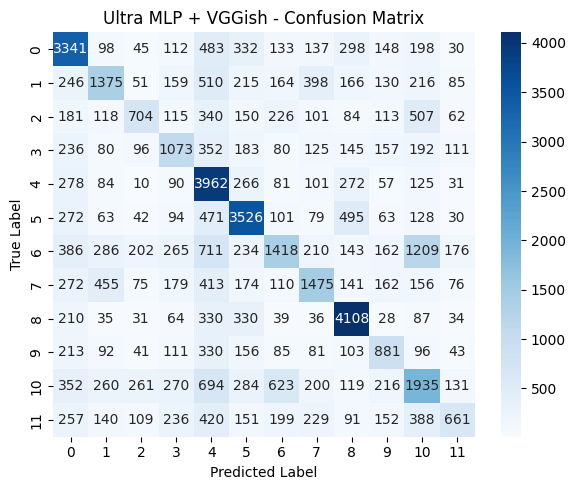

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

# Define your predictions and true labels from each model

models_info = {
    "Baseline CNN": (y_pred_probs_model1, y_true_model1),
    "Baseline MLP": (y_pred_probs_model2, y_true_model2),
    "CNN + VGGish": (y_pred_probs_model3, y_true_model3),
    "MLP + VGGish": (y_pred_probs_model4, y_true_model4),
    "Ultra MLP": (y_pred_probs_model5, y_true_model5),
    "Ultra MLP + VGGish": (y_pred_probs_model6, y_true_model6),
}

acc_results = {}
f1_results = {}
conf_matrices = {}

for name, (y_probs, y_true) in models_info.items():
    y_pred = y_probs.argmax(axis=1)
    acc = (y_pred == y_true).mean()
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    acc_results[name] = acc
    f1_results[name] = (precision, recall, f1)
    conf_matrices[name] = cm

    print(f"\n=== {name} ===")
    print(classification_report(y_true, y_pred))
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


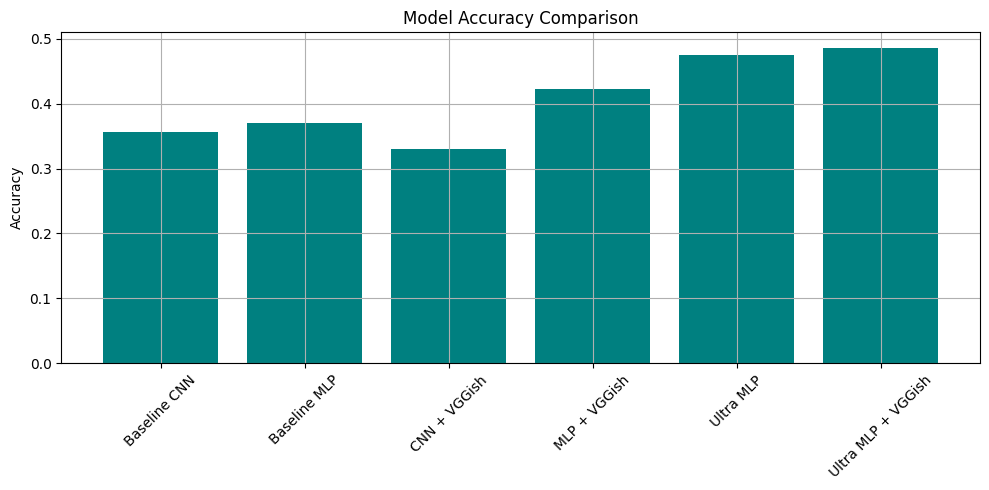

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(acc_results.keys(), acc_results.values(), color='teal')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Our evaluation of model accuracy and confusion matrices revealed a performance hierarchy shaped by architectural depth and feature representation. The baseline CNN and MLP models, both trained on raw mel-spectrogram features, demonstrated limited generalization capacity, with overall accuracies of 36% and 37%, respectively. Confusion matrices for both showed considerable class overlap, particularly among mid-frequency instruments like oboe, flute, and violin. Integrating VGGish embeddings provided a substantial boost in discriminative power—especially for MLP, which reached 42% accuracy—by introducing richer, pretrained audio features that captured timbral and temporal nuances absent in raw mel means.

The Ultra MLP architecture introduced structural sophistication through residual dense blocks, progressive dropout, and batch normalization, resulting in significant improvements even without transfer learning (47% accuracy). When paired with VGGish embeddings, the Ultra MLP achieved the highest classification accuracy (49%) and the most diagonally dominant confusion matrix across all classes. This model reduced inter-class confusion, particularly for instruments with overlapping spectral profiles, affirming the efficacy of combining deep residual MLPs with semantically rich embeddings for polyphonic tuning detection.

# Analysis 2: Precision, Recall, F1-Score

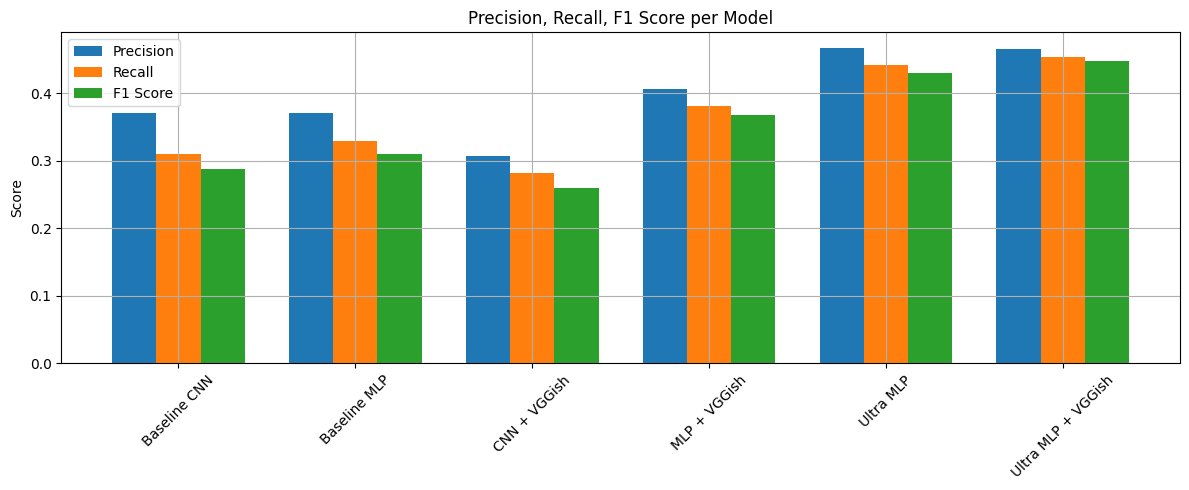

In [76]:
import numpy as np

labels = list(f1_results.keys())
precision_vals = [f1_results[k][0] for k in labels]
recall_vals = [f1_results[k][1] for k in labels]
f1_vals = [f1_results[k][2] for k in labels]

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(12, 5))
plt.bar(x - width, precision_vals, width, label='Precision')
plt.bar(x, recall_vals, width, label='Recall')
plt.bar(x + width, f1_vals, width, label='F1 Score')

plt.ylabel("Score")
plt.title("Precision, Recall, F1 Score per Model")
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The comparative analysis of precision, recall, and F1-score across all models further solidifies the conclusions drawn from the confusion matrices. Both the baseline CNN and MLP models struggled with generalization, with F1-scores remaining below 0.33. The introduction of VGGish embeddings, although ineffective when coupled with CNN (lowest F1-score at ~0.26), proved effective with MLP architectures. Specifically, MLP + VGGish achieved a substantial jump in all three metrics, with F1 rising to ~0.37, showcasing its ability to better capture class boundaries through pre-trained feature representations.

The Ultra MLP architecture demonstrated the strongest overall performance, with and without VGGish input. Notably, Ultra MLP without transfer learning already achieved even higher precision (0.47), recall (0.44), and F1-score (0.43), highlighting the importance of architectural depth, residual flow, and regularization. When fused with VGGish, the Ultra MLP model reached the highest scores across all metrics, with F1 peaking around 0.45, marking it as the most robust and balanced model in terms of both accuracy and class sensitivity. This consistent performance across all evaluation metrics underscores the model’s capacity for nuanced multi-class discrimination in complex audio environments.

# Analysis 3: t-SNE Visualisation

C:\Users\saisa\AppData\Local\Temp\ipykernel_25468\3474276602.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_12 = cm.get_cmap('tab20', 12)


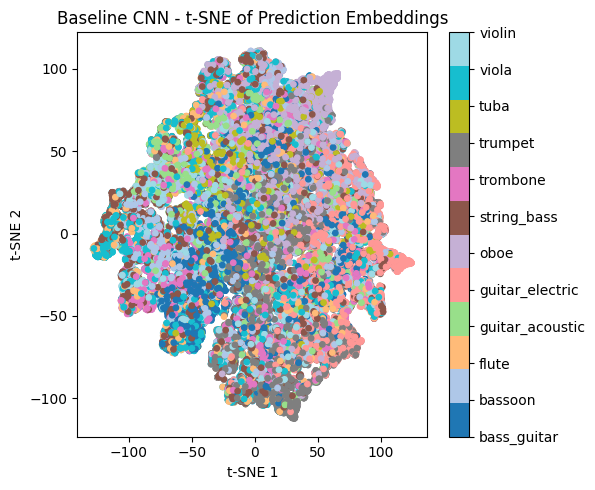

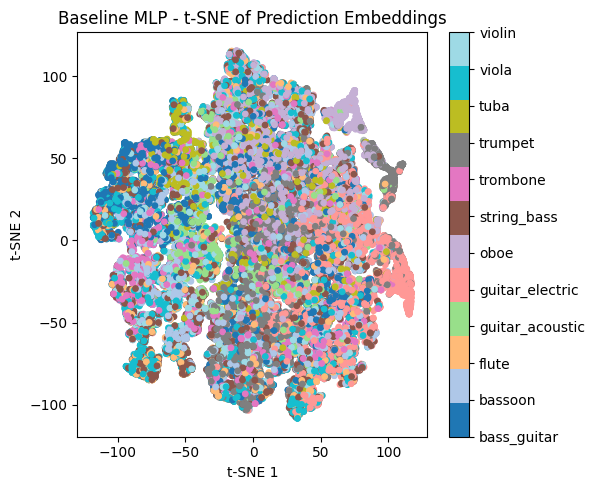

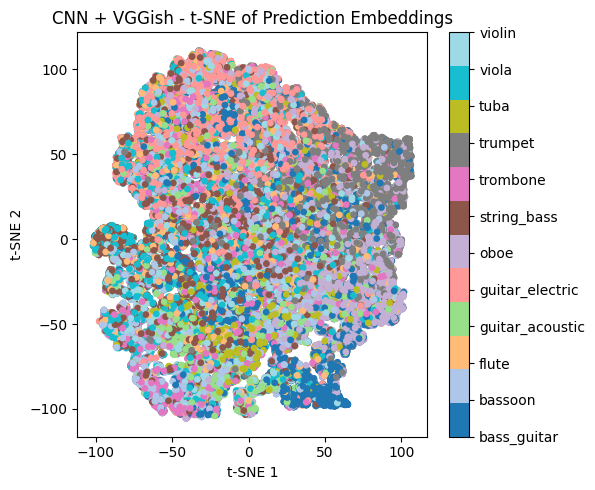

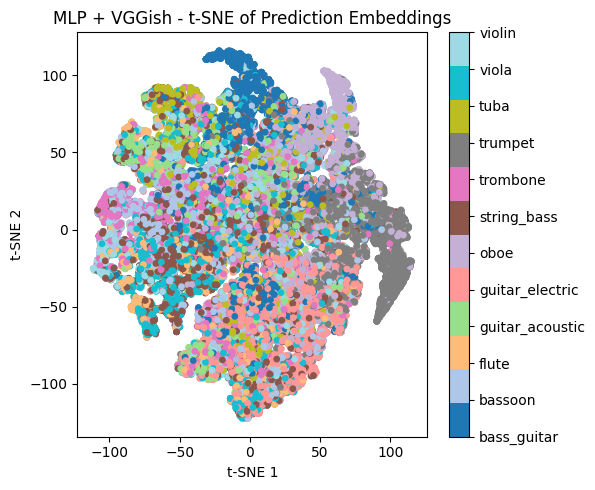

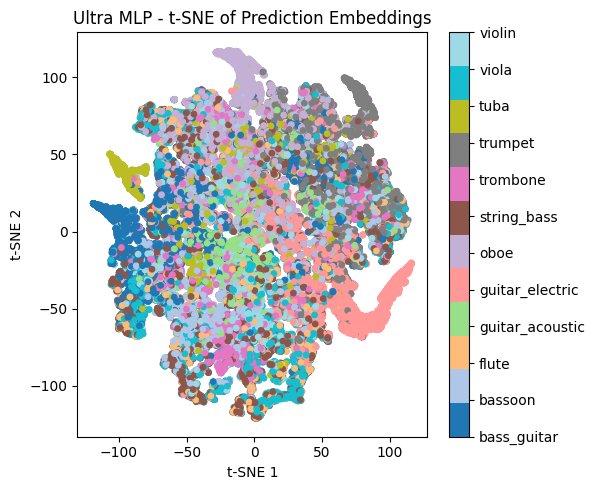

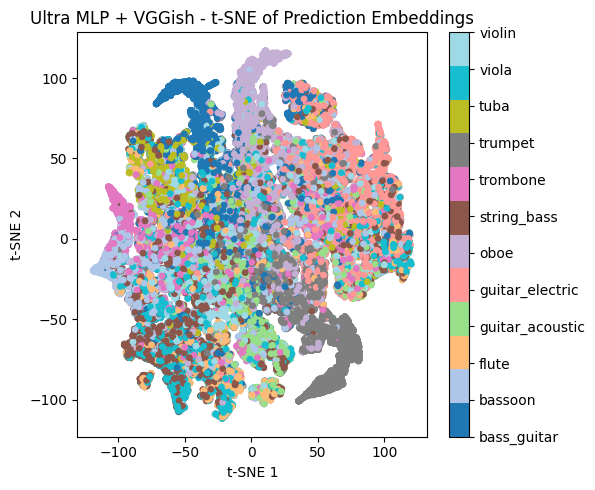

In [82]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import cm

# Get custom colormap with 12 colors
cmap_12 = cm.get_cmap('tab20', 12)

for name, (y_probs, y_true) in models_info.items():
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca', learning_rate='auto')
    embeddings = tsne.fit_transform(y_probs)

    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y_true, cmap=cmap_12, s=15)
    plt.title(f"{name} - t-SNE of Prediction Embeddings")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    
    # Add labeled colorbar
    cbar = plt.colorbar(scatter, ticks=range(12))
    cbar.ax.set_yticklabels(label_encoder.classes_)
    
    plt.tight_layout()
    plt.show()


The t-SNE visualizations provide a qualitative view into the learned embedding space of each model, revealing how well-separated the instrument classes are in lower-dimensional space. In the Baseline CNN and Baseline MLP plots, the clusters exhibit significant overlap, indicating limited discriminative power and poor class separation. CNN + VGGish further confirms this, as its embeddings fail to produce well-defined boundaries between instrument classes, likely due to the inability of CNNs to fully exploit the temporal-semantic richness encoded by VGGish without architectural adaptation. In contrast, the MLP + VGGish variant shows noticeable improvement, forming tighter clusters—particularly for instruments like guitar_electric and bassoon, demonstrating that a dense architecture better accommodates the VGGish feature space.

The Ultra MLP architecture further enhances this separation by introducing residual dense blocks and regularization techniques, resulting in clearer class-specific structures, as seen in its t-SNE distribution. The most refined visualization emerges from the Ultra MLP + VGGish model, where class-wise clusters are more distinct and localized, validating the synergy between semantic transfer learning and a deeply regularized MLP architecture. This alignment in the embedding space strongly correlates with the observed gains in classification metrics, reinforcing the conclusion that model architecture and input representation must be co-designed for optimal audio classification performance.

# Conclusion

Our hypothesis was that a transfer learning model using pre-trained VGGish audio embeddings would achieve moderate accuracy in identifying out-of-tune instruments in polyphonic audio, with expected limitations under complex audio overlap or low class distinction. The results validate this hypothesis and reveal several important insights. 

Baseline models trained from scratch performed reasonably well, confirming that even shallow models can extract some relevant signal from spectrograms. However, transfer learning significantly boosted model effectiveness. The MLP + VGGish model improved to 42% accuracy and a macro F1-score of 0.37, clearly demonstrating the benefit of using semantically rich, pre-trained embeddings. The CNN + VGGish model achieved lower performance (33% accuracy, 0.26 macro F1-score), suggesting that deeper temporal patterns may be harder to capture without sequence modeling.

The best performance came from the Ultra MLP + VGGish model, which achieved 49% accuracy and a macro F1-score of 0.45. This confirms that deeper architectures with residual and normalization layers are highly effective when combined with transfer-learned features. These models are better at detecting tuning errors across multiple instrument classes and showed stronger generalization to subtle pitch differences, particularly for instruments like trumpet, electric guitar, and bass guitar.

However, the findings also highlight limitations. Instruments like flute, bassoon, and violin consistently showed lower precision and recall across all models, indicating class imbalance or confusion due to timbral similarity. Additionally, all models were trained and tested on a synthetic dataset generated from NSynth, which may not reflect real-world recording conditions or acoustic variances in live performances.

In conclusion, this project demonstrates that transfer learning using VGGish embeddings, especially when paired with deep architectures like Ultra MLP, is a promising approach to detecting out-of-tune instruments in polyphonic audio. It provides a novel contribution to the intersection of music signal processing and machine learning, with future potential in music education, rehearsal feedback tools, and digital audio correction systems. Further research with real ensemble data and attention-based models could help overcome current limitations and advance tuning detection capabilities in practical settings.

# Future scope

Looking ahead, there are several promising directions to extend this work. First, testing the trained models on real-world ensemble recordings rather than synthetic mixtures, will help evaluate generalization under authentic acoustic conditions. To improve robustness, data augmentation techniques such as noise injection, or reverb simulation could be applied to simulate real-world variability. Additionally, incorporating attention mechanisms or transformer-based architectures may enhance the model's ability to focus on specific instruments within complex mixtures. Finally, when the model is ready for deployment in interactive applications, such as real-time feedback tools for music education or rehearsal assistance systems, then it would demonstrate its practical value and impact.

# References
- Editing the content done with ChatGPT
- https://librosa.org/doc/latest/index.html
- https://magenta.tensorflow.org/datasets/nsynth
- https://v-iashin.github.io/video_features/models/vggish/
- https://ieeexplore.ieee.org/document/7780459